In [91]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import sklearn
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics

## Data Acquisition

In [92]:
df_athletes = pd.read_csv('athlete_events.csv')
df_athletes

ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1988 Winter  1988  Winter         Calgary   
...                ...  ...          ...   ...     ...             ...   
271111        Poland-1  POL  1976 Winter  1976  Winter       Innsbruck   
271112          Poland  POL  2014 Winter  2014  Winter           Sochi   
271113          Poland  POL  2014 Winter  2014  Winter           Sochi   
271114          Poland  POL  1998 Winter  1998  Winter          Nagano   
271115          Poland  POL  2002 Winter  2002  Winter  Salt Lake City   

                Sport                                     Event Medal  
0          Basketball               Basketball Men's Basketball   NaN  
1                Judo              Judo Men's Extra-Lightweight   NaN  
2            Football                   Football Men's Football   NaN  
3          Tug-Of-War               Tug-Of-War Men's Tug-Of-War  Gold  
4       Speed Skating          Speed Skating Women's 500 metres   NaN  
...               ...                                       ...   ...  
271111           Luge                Luge Mixed (Men)'s Doubles   NaN  
271112    Ski Jumping  Ski Jumping Men's Large Hill, Individual   NaN  
271113    Ski Jumping        Ski Jumping Men's Large Hill, Team   NaN  
271114      Bobsleigh                      Bobsleigh Men's Four   NaN  
271115      Bobsleigh                      Bobsleigh Men's Four   NaN  

[271116 rows x 15 columns]

In [93]:
noc_regions=  pd.read_csv('noc_regions.csv')
noc_regions

NOC       region                 notes
0    AFG  Afghanistan                   NaN
1    AHO      Curacao  Netherlands Antilles
2    ALB      Albania                   NaN
3    ALG      Algeria                   NaN
4    AND      Andorra                   NaN
..   ...          ...                   ...
225  YEM        Yemen                   NaN
226  YMD        Yemen           South Yemen
227  YUG       Serbia            Yugoslavia
228  ZAM       Zambia                   NaN
229  ZIM     Zimbabwe                   NaN

[230 rows x 3 columns]

In [94]:
countries_info = pd.read_csv('countries_info.csv')
countries_info

Country Name Country Code  \
0                                             Argentina          ARG   
1                                             Argentina          ARG   
2                                             Argentina          ARG   
3                                             Argentina          ARG   
4                                             Argentina          ARG   
...                                                 ...          ...   
14630                                               NaN          NaN   
14631                                               NaN          NaN   
14632                                               NaN          NaN   
14633  Data from database: World Development Indicators          NaN   
14634                          Last Updated: 02/21/2024          NaN   

                                             Series Name     Series Code  \
0      Adolescent fertility rate (births per 1,000 wo...     SP.ADO.TFRT   
1      Agriculture, forestry, and fishing, value adde...  NV.AGR.TOTL.ZS   
2      Annual freshwater withdrawals, total (% of int...  ER.H2O.FWTL.ZS   
3      Births attended by skilled health staff (% of ...  SH.STA.BRTC.ZS   
4                 CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC   
...                                                  ...             ...   
14630                                                NaN             NaN   
14631                                                NaN             NaN   
14632                                                NaN             NaN   
14633                                                NaN             NaN   
14634                                                NaN             NaN   

          1966 [YR1966]     1967 [YR1967]     1968 [YR1968]     1969 [YR1969]  \
0                58.684            59.825            60.988            62.583   
1      10.2787574725073  9.98038631665412  9.72127698537181  9.18580964838541   
2                    ..                ..                ..                ..   
3                    ..                ..                ..                ..   
4                    ..                ..                ..                ..   
...                 ...               ...               ...               ...   
14630               NaN               NaN               NaN               NaN   
14631               NaN               NaN               NaN               NaN   
14632               NaN               NaN               NaN               NaN   
14633               NaN               NaN               NaN               NaN   
14634               NaN               NaN               NaN               NaN   

         1970 [YR1970]     1971 [YR1971]  ...     2001 [YR2001]  \
0               64.638            64.962  ...                64   
1      9.6375609641048  10.8658823843399  ...  4.56858960891786   
2                   ..                ..  ...  10.6275077833219   
3                   ..                ..  ...              98.4   
4                   ..                ..  ...  3.34187706655833   
...                ...               ...  ...               ...   
14630              NaN               NaN  ...               NaN   
14631              NaN               NaN  ...               NaN   
14632              NaN               NaN  ...               NaN   
14633              NaN               NaN  ...               NaN   
14634              NaN               NaN  ...               NaN   

          2002 [YR2002]     2003 [YR2003]     2004 [YR2004]     2005 [YR2005]  \
0                63.078            60.281             62.62            64.877   
1      10.2066467144411   10.328166939117  8.36248661002826  7.93875427420938   
2      10.8554522104452  11.0833966376027  11.3113410647603  11.5392854919178   
3                  98.9              98.7              99.1              99.1   
4      3.10048866797723  3.33489087930132  3.65608487008491  3.73671686472615   
.

## Data Cleaning

In [95]:

columns_to_keep = ['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 
                   'Games', 'Year', 'Season', 'City', 'Sport', 'Event']
df_athletes_cleaned = df_athletes.dropna(subset=columns_to_keep).sort_values('Year')

# Change remaining Nan values in medal column to be 'None'
df_athletes_cleaned['target'] = df_athletes_cleaned['Medal'].fillna('None')

# Drop the original 'Medal' column
df_athletes_cleaned.drop(columns=['Medal'], inplace=True)

# Reset index after sorting and dropping
df_athletes_cleaned.reset_index(drop=True, inplace=True)

# Merge the DataFrames on 'NOC' column and rename 'region' to 'Country'
df_data = pd.merge(df_athletes, noc_regions, how='inner', on='NOC').rename(columns={'region': 'Country'})

# Drop redundant columns 
columns_to_drop = ['Name', 'ID', 'NOC', 'Team', 'Games', 'notes', 'City']
df_data.drop(columns=columns_to_drop, inplace=True)


In [96]:

desired_series_names = {
    'GDP (current US$)': 'GDP',
    'CO2 emissions (metric tons per capita)': 'CO2',
    'GNI per capita, Atlas method (current US$)': 'GNI',
    'Life expectancy at birth, total (years)': 'Life_expt',
    'Mortality rate, under-5 (per 1,000 live births)': 'mort_rate',
    'Population, total': 'population',
    'Immunization, measles (% of children ages 12-23 months)': 'immunization'
}

# Filter based on desired series names
condition = countries_info['Series Name'].isin(desired_series_names.keys())
filtered_df = countries_info[condition]

# Replace '..' with NaN
filtered_df = filtered_df.replace('..', np.nan)

# Drop unnecessary column
filtered_df.drop(columns=['Series Code'], inplace=True)

# Extract years from columns
year_columns = filtered_df.columns[3:].str.extract(r'\[YR(\d{4})\]')

# Add only the extracted years to the DataFrame columns
filtered_df.columns = filtered_df.columns[:3].tolist() + year_columns.dropna().squeeze().tolist()

# Mapping series names
filtered_df['Series Name'] = filtered_df['Series Name'].map(desired_series_names)

filtered_df


Country Name Country Code   Series Name              1966  \
4        Argentina          ARG           CO2               NaN   
14       Argentina          ARG           GDP               NaN   
16       Argentina          ARG           GNI               NaN   
22       Argentina          ARG  immunization               NaN   
27       Argentina          ARG     Life_expt            64.891   
...            ...          ...           ...               ...   
14591        World          WLD           GNI  681.493958704788   
14597        World          WLD  immunization               NaN   
14602        World          WLD     Life_expt  56.3897434722829   
14606        World          WLD     mort_rate               NaN   
14613        World          WLD    population        3398480280   

                   1967              1968              1969              1970  \
4                   NaN               NaN               NaN               NaN   
14                  NaN               NaN               NaN               NaN   
16                  NaN               NaN               NaN               NaN   
22                  NaN               NaN               NaN               NaN   
27               64.992             64.89            64.859            65.589   
...                 ...               ...               ...               ...   
14591  711.966893757814  764.151389494603  824.008361480501  869.487197692623   
14597               NaN               NaN               NaN               NaN   
14602  56.7947841392675  57.2254211441914  57.5355515965785  57.8409463137779   
14606               NaN               NaN               NaN               NaN   
14613        3468370526        3540164023        3614572835        3690209960   

                   1971              1972  ...              2001  \
4                   NaN               NaN  ...  3.34187706655833   
14                  NaN               NaN  ...      268696750000   
16                  NaN               NaN  ...              6960   
22                  NaN               NaN  ...                89   
27               65.541            65.923  ...            74.186   
...                 ...               ...  ...               ...   
14591  934.717183612368  1052.81669360821  ...  5494.87452261945   
14597               NaN               NaN  ...  72.7801935499817   
14602  57.9672379252118  58.7929243087486  ...  68.0522403020675   
14606               NaN               NaN  ...              73.8   
14613        3767930001        3843607574  ...        6226348086   

                   2002              2003              2004              2005  \
4      3.10048866797723  3.33489087930132  3.65608487008491  3.73671686472615   
14     97724004251.8602  127586973492.177  164657930452.787  198737095012.282   
16                 4020              3640              3360              4240   
22                   95                97                99                98   
27               74.408             74.08            74.855            75.139   
...                 ...               ...               ...               ...   
14591  5448.46471218681  5843.24764817355  6656.66976636272  7369.78550660431   
14597  72.2814174920934  73.8192151186891  75.6689650258988  77.0519126441878   
14602  68.3332219562297  68.6068363929736  68.8623052877871  69.1987413121306   
14606              71.2              68.5                66              63.1   
14613        6308140970        6389462496        6470924346        6552700448   

                   2006              2013              2014              2015  \
4      3.92426184145235  4.34225013023383  4.20911189491323  4.30191380564475   
14     232557260817.308  552025140252.246  526319673731.638  594749285413.212   
16                 5460             12870             12350             12600   
22                   97                94                95                89   
27               75.433          

In [97]:
melted_df = pd.melt(filtered_df, id_vars=['Country Name', 'Country Code', 'Series Name'], var_name='Year', value_name='Value')
melted_df['Value'] = pd.to_numeric(melted_df['Value'], errors='coerce')

# Pivot the DataFrame
pivoted_df = melted_df.pivot_table(index=['Country Name', 'Country Code', 'Year'], columns='Series Name', values='Value').reset_index()

pivoted_df

Series Name Country Name Country Code  Year       CO2           GDP     GNI  \
0            Afghanistan          AFG  1966       NaN  1.400000e+09     NaN   
1            Afghanistan          AFG  1967       NaN  1.673333e+09     NaN   
2            Afghanistan          AFG  1968       NaN  1.373333e+09     NaN   
3            Afghanistan          AFG  1969       NaN  1.408889e+09     NaN   
4            Afghanistan          AFG  1970       NaN  1.748887e+09     NaN   
...                  ...          ...   ...       ...           ...     ...   
8201            Zimbabwe          ZWE  2006  0.794113  5.443896e+09   290.0   
8202            Zimbabwe          ZWE  2013  0.901248  1.909102e+10  1200.0   
8203            Zimbabwe          ZWE  2014  0.866838  1.949552e+10  1210.0   
8204            Zimbabwe          ZWE  2015  0.846962  1.996312e+10  1220.0   
8205            Zimbabwe          ZWE  2016  0.723062  2.054868e+10  1200.0   

Series Name  Life_expt  immunization  mort_rate  population  
0               35.453           NaN      323.9   9783147.0  
1               35.924           NaN      318.4  10010030.0  
2               36.418           NaN      312.8  10247780.0  
3               36.910           NaN      307.2  10494489.0  
4               37.418           NaN      301.9  10752971.0  
...                ...           ...        ...         ...  
8201            45.364          68.0       95.6  12330490.0  
8202            57.458          93.0       66.2  13555422.0  
8203            58.846          92.0       62.6  13855753.0  
8204            59.591          86.0       60.5  14154937.0  
8205            60.306          95.0       57.9  14452704.0  

[8206 rows x 10 columns]

In [98]:
df_data['Year'] = df_data['Year'].astype(str)
pivoted_df['Year'] = pivoted_df['Year'].astype(str)

In [ ]:
final_df = pd.merge(df_data, pivoted_df, 
                    left_on=['Year', 'Country'], 
                    right_on=['Year', 'Country Name'])


final_df.drop(columns=['Country Name','Country Code'], inplace=True)
final_df = final_df[['Sex', 'Age', 'Height', 'Weight', 'Year', 'Season', 'Sport', 'Event', 'Country', 'CO2', 'GDP', 'GNI', 'Life_expt', 'immunization', 'mort_rate', 'population', 'Medal']]
final_df

## Feature Engineering

In [71]:

# Insert BMI
height = final_df['Height']
weight = final_df['Weight']
bmi = weight / ((height/100)**2)
final_df.insert(4, 'BMI', bmi)


index_before_last_column = final_df.columns.get_loc(final_df.columns[-1])

# Insert number of athletes sent by country as a new column
final_df.insert(index_before_last_column, 'Number of athletes', df_data.groupby('Country')['Country'].transform('count'))

In [72]:
df = final_df
df

Sex   Age  Height  Weight        BMI  Year  Season          Sport  \
0       F  21.0   185.0    82.0  23.959094  1988  Winter  Speed Skating   
1       F  21.0   185.0    82.0  23.959094  1988  Winter  Speed Skating   
2       M  26.0   186.0    96.0  27.748873  2002  Winter     Ice Hockey   
3       M  31.0   172.0    70.0  23.661439  2000  Summer      Badminton   
4       F  34.0   159.0    55.5  21.953246  2000  Summer        Sailing   
...    ..   ...     ...     ...        ...   ...     ...            ...   
82070   F  33.0   171.0    69.0  23.597004  2016  Summer     Basketball   
82071   M  27.0   176.0    59.0  19.047004  2014  Winter    Ski Jumping   
82072   M  27.0   176.0    59.0  19.047004  2014  Winter    Ski Jumping   
82073   M  30.0   185.0    96.0  28.049671  1998  Winter      Bobsleigh   
82074   M  34.0   185.0    96.0  28.049671  2002  Winter      Bobsleigh   

                                          Event      Country        CO2  \
0              Speed Skating Women's 500 metres  Netherlands        NaN   
1            Speed Skating Women's 1,000 metres  Netherlands        NaN   
2                   Ice Hockey Men's Ice Hockey      Finland  12.198539   
3                       Badminton Men's Singles      Finland  10.644373   
4                    Sailing Women's Windsurfer      Finland  10.644373   
...                                         ...          ...        ...   
82070             Basketball Women's Basketball      Belarus   5.829464   
82071  Ski Jumping Men's Large Hill, Individual       Poland   7.516889   
82072        Ski Jumping Men's Large Hill, Team       Poland   7.516889   
82073                      Bobsleigh Men's Four       Poland   8.235526   
82074                      Bobsleigh Men's Four       Poland   7.515500   

                GDP      GNI  Life_expt  immunization  mort_rate  population  \
0      2.619105e+11  18190.0  76.890244          94.0        8.9  14760094.0   
1      2.619105e+11  18190.0  76.890244          94.0        8.9  14760094.0   
2      1.404045e+11  25620.0  78.119512          96.0        4.1   5200598.0   
3      1.260195e+11  26480.0  77.465854          96.0        4.3   5176209.0   
4      1.260195e+11  26480.0  77.465854          96.0        4.3   5176209.0   
...             ...      ...        ...           ...        ...         ...   
82070  4.772355e+10   5640.0  73.826829          98.0        3.9   9469379.0   
82071  5.390805e+11  13470.0  77.602439          97.0        5.0  38011735.0   
82072  5.390805e+11  13470.0  77.602439          97.0        5.0  38011735.0   
82073  1.746858e+11   4360.0  72.997561          97.0       10.9  38663481.0   
82074  1.990704e+11   4900.0  74.497561          98.0        8.4  38230364.0   

       Number of athletes Medal  
0                  5826.0   NaN  
1                  5826.0   NaN  
2                  3570.0   NaN  
3                  3570.0   NaN  
4                  5839.0   NaN  
...                   ...   ...  
82070               927.0   NaN  
82071               927.0   NaN  
82072               927.0   NaN  
82073               927.0   NaN  
82074             18853.0   NaN  

[82075 rows x 19 columns]

## Data Preprocessing

### Skewness

In [73]:
from sklearn.impute import SimpleImputer

categorical_cols = ['Sex', 'Year', 'Season', 'Sport', 'Event', 'Country']

numerical_cols = final_df.select_dtypes(include=[np.number]).columns

numerical_imputer = SimpleImputer(strategy='mean')  
final_df[numerical_cols] = numerical_imputer.fit_transform(final_df[numerical_cols])

categorical_imputer = SimpleImputer(strategy='most_frequent')
final_df[categorical_cols] = categorical_imputer.fit_transform(final_df[categorical_cols])


skewness = df[numerical_cols].skew()
skew_threshold = 0.70

updated_numerical_columns = []

for column in numerical_cols:
    if abs(skewness[column]) > skew_threshold:
        df[column] = np.log1p(df[column])
        updated_numerical_columns.append(column)
    else:
        updated_numerical_columns.append(column)

updated_df = pd.concat([df[updated_numerical_columns], df[categorical_cols]], axis=1)
updated_df = pd.concat([updated_df, df['Medal']], axis=1)
updated_df

Age  Height    Weight       BMI       CO2        GDP        GNI  \
0      3.091042   185.0  4.418841  3.217238  2.125768  26.291269   9.808682   
1      3.091042   185.0  4.418841  3.217238  2.125768  26.291269   9.808682   
2      3.295837   186.0  4.574711  3.358599  2.580106  25.667793  10.151168   
3      3.465736   172.0  4.262680  3.205241  2.454823  25.559703  10.184183   
4      3.555348   159.0  4.034241  3.133459  2.454823  25.559703  10.184183   
...         ...     ...       ...       ...       ...        ...        ...   
82070  3.526361   171.0  4.248495  3.202625  1.921246  24.588691   8.637817   
82071  3.332205   176.0  4.094345  2.998080  2.142051  27.013131   9.508295   
82072  3.332205   176.0  4.094345  2.998080  2.142051  27.013131   9.508295   
82073  3.433987   185.0  4.574711  3.369007  2.223058  25.886255   8.380457   
82074  3.555348   185.0  4.574711  3.369007  2.141888  26.016925   8.497195   

       Life_expt  immunization  mort_rate  population  Number of athletes Sex  \
0       4.355301      4.553877   2.292535   16.507438              5826.0   F   
1       4.355301      4.553877   2.292535   16.507438              5826.0   F   
2       4.370960      4.574711   1.629241   15.464284              3570.0   M   
3       4.362664      4.574711   1.667707   15.459584              3570.0   M   
4       4.362664      4.574711   1.667707   15.459584              5839.0   F   
...          ...           ...        ...         ...                 ...  ..   
82070   4.315177      4.595120   1.589235   16.063574               927.0   F   
82071   4.364403      4.584967   1.791759   17.453406               927.0   M   
82072   4.364403      4.584967   1.791759   17.453406               927.0   M   
82073   4.304032      4.584967   2.476538   17.470406               927.0   M   
82074   4.324100      4.595120   2.240710   17.459141             18853.0   M   

       Year  Season          Sport                                     Event  \
0      1988  Winter  Speed Skating          Speed Skating Women's 500 metres   
1      1988  Winter  Speed Skating        Speed Skating Women's 1,000 metres   
2      2002  Winter     Ice Hockey               Ice Hockey Men's Ice Hockey   
3      2000  Summer      Badminton                   Badminton Men's Singles   
4      2000  Summer        Sailing                Sailing Women's Windsurfer   
...     ...     ...            ...                                       ...   
82070  2016  Summer     Basketball             Basketball Women's Basketball   
82071  2014  Winter    Ski Jumping  Ski Jumping Men's Large Hill, Individual   
82072  2014  Winter    Ski Jumping        Ski Jumping Men's Large Hill, Team   
82073  1998  Winter      Bobsleigh                      Bobsleigh Men's Four   
82074  2002  Winter      Bobsleigh                      Bobsleigh Men's Four   

           Country Medal  
0      Netherlands   NaN  
1      Netherlands   NaN  
2          Finland   NaN  
3          Finland   NaN  
4          Finland   NaN  
...            ...   ...  
82070      Belarus   NaN  
82071       Poland   NaN  
82072       Poland   NaN  
82073       Poland   NaN  
82074       Poland   NaN  

[82075 rows x 19 columns]

### Categorical Encoding

In [90]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from category_encoders import BinaryEncoder

df = updated_df
df['Medal'] = df['Medal'].fillna('None')

binary_encoder = BinaryEncoder(cols=['Event', 'Sport', 'Country'])
df_binary_encoded = binary_encoder.fit_transform(df[['Event', 'Sport', 'Country']])

# One-hot encoding for ['Sex', 'Season']
df_one_hot_encoded = pd.get_dummies(df[['Sex', 'Season']])

# Label encoding for 'Medal'
target_labels = {'Gold': 1, 'Silver': 2, 'Bronze': 3, 'None': 4}
df['Medal'] = df['Medal'].map(target_labels)

# Concatenate all encoded features
df_encoded = pd.concat([df_binary_encoded, df_one_hot_encoded, df['Medal']], axis=1)

df = df_encoded
df

Event_0  Event_1  Event_2  Event_3  Event_4  Event_5  Event_6  Event_7  \
0            0        0        0        0        0        0        0        0   
1            0        0        0        0        0        0        0        1   
2            0        0        0        0        0        0        0        1   
3            0        0        0        0        0        0        1        0   
4            0        0        0        0        0        0        1        0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
82070        0        1        0        1        1        1        1        0   
82071        1        0        0        0        0        1        0        0   
82072        1        0        0        0        0        1        0        1   
82073        0        0        0        0        1        0        0        1   
82074        0        0        0        0        1        0        0        1   

       Event_8  Sport_0  ...  Country_3  Country_4  Country_5  Country_6  \
0            1        0  ...          0          0          0          0   
1            0        0  ...          0          0          0          0   
2            1        0  ...          0          0          0          1   
3            0        0  ...          0          0          0          1   
4            1        0  ...          0          0          0          1   
...        ...      ...  ...        ...        ...        ...        ...   
82070        0        0  ...          0          1          1          0   
82071        1        1  ...          0          0          1          1   
82072        0        1  ...          0          0          1          1   
82073        1        0  ...          0          0          1          1   
82074        1        0  ...          0          0          1          1   

       Country_7  Sex_F  Sex_M  Season_Summer  Season_Winter  Medal  
0              1   True  False          False           True    NaN  
1              1   True  False          False           True    NaN  
2              0  False   True          False           True    NaN  
3              0  False   True           True          False    NaN  
4              0   True  False           True          False    NaN  
...          ...    ...    ...            ...            ...    ...  
82070          1   True  False           True          False    NaN  
82071          0  False   True          False           True    NaN  
82072          0  False   True          False           True    NaN  
82073          0  False   True          False           True    NaN  
82074          0  False   True          False           True    NaN  

[82075 rows x 28 columns]

## Data Exploration

In [79]:
class_counts = df['Medal'].value_counts()

print(class_counts)

Medal
4    72551
3     3490
2     3200
1     2834
Name: count, dtype: int64


## Models

Text(0.5, 1.0, 'Medals Olympics Distribution')

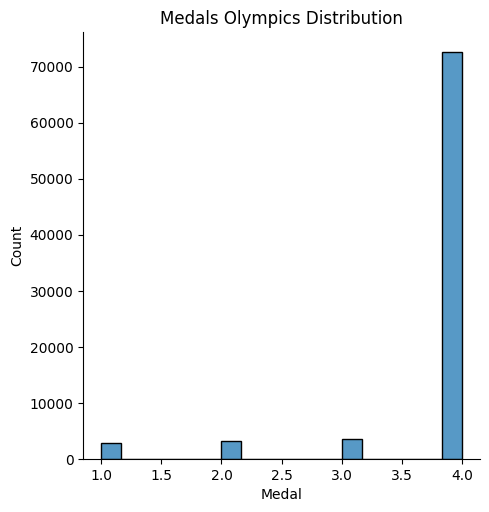

In [80]:
sns.displot(df, x="Medal")

title = "Medals Olympics Distribution"

plt.title(title)

In [81]:
!pip install catboost

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImblearnPipeline
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier




In [82]:
X = df.drop(columns=['Medal'])
y = df['Medal']



In [83]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

sm = SMOTE(sampling_strategy='all', random_state=3000)
X_resampled, y_resampled = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [84]:


clf = CatBoostClassifier()
clf.fit(X_train, y_train)


Learning rate set to 0.104467
0:	learn: 1.3725556	total: 81.3ms	remaining: 1m 21s
1:	learn: 1.3600503	total: 104ms	remaining: 51.9s
2:	learn: 1.3498509	total: 127ms	remaining: 42s
3:	learn: 1.3383548	total: 146ms	remaining: 36.5s
4:	learn: 1.3297062	total: 165ms	remaining: 32.9s
5:	learn: 1.3231055	total: 185ms	remaining: 30.7s
6:	learn: 1.3167095	total: 205ms	remaining: 29s
7:	learn: 1.3108691	total: 224ms	remaining: 27.8s
8:	learn: 1.3027104	total: 244ms	remaining: 26.8s
9:	learn: 1.2976521	total: 263ms	remaining: 26s
10:	learn: 1.2882941	total: 282ms	remaining: 25.4s
11:	learn: 1.2830857	total: 302ms	remaining: 24.8s
12:	learn: 1.2745685	total: 322ms	remaining: 24.4s
13:	learn: 1.2702406	total: 340ms	remaining: 23.9s
14:	learn: 1.2655916	total: 358ms	remaining: 23.5s
15:	learn: 1.2583646	total: 377ms	remaining: 23.2s
16:	learn: 1.2493092	total: 397ms	remaining: 22.9s
17:	learn: 1.2454475	total: 418ms	remaining: 22.8s
18:	learn: 1.2421919	total: 436ms	remaining: 22.5s
19:	learn: 1.23

169:	learn: 0.9324580	total: 3.43s	remaining: 16.8s
170:	learn: 0.9312447	total: 3.45s	remaining: 16.7s
171:	learn: 0.9308989	total: 3.47s	remaining: 16.7s
172:	learn: 0.9299765	total: 3.49s	remaining: 16.7s
173:	learn: 0.9290346	total: 3.51s	remaining: 16.7s
174:	learn: 0.9282855	total: 3.53s	remaining: 16.6s
175:	learn: 0.9274464	total: 3.55s	remaining: 16.6s
176:	learn: 0.9262844	total: 3.57s	remaining: 16.6s
177:	learn: 0.9251827	total: 3.59s	remaining: 16.6s
178:	learn: 0.9247612	total: 3.61s	remaining: 16.6s
179:	learn: 0.9238359	total: 3.63s	remaining: 16.6s
180:	learn: 0.9232983	total: 3.65s	remaining: 16.5s
181:	learn: 0.9228671	total: 3.68s	remaining: 16.5s
182:	learn: 0.9217474	total: 3.7s	remaining: 16.5s
183:	learn: 0.9208968	total: 3.72s	remaining: 16.5s
184:	learn: 0.9204860	total: 3.73s	remaining: 16.5s
185:	learn: 0.9194682	total: 3.75s	remaining: 16.4s
186:	learn: 0.9185015	total: 3.77s	remaining: 16.4s
187:	learn: 0.9181792	total: 3.79s	remaining: 16.4s
188:	learn: 0

330:	learn: 0.8249981	total: 6.65s	remaining: 13.4s
331:	learn: 0.8248371	total: 6.67s	remaining: 13.4s
332:	learn: 0.8243594	total: 6.69s	remaining: 13.4s
333:	learn: 0.8238475	total: 6.71s	remaining: 13.4s
334:	learn: 0.8233506	total: 6.73s	remaining: 13.4s
335:	learn: 0.8230577	total: 6.75s	remaining: 13.3s
336:	learn: 0.8227398	total: 6.77s	remaining: 13.3s
337:	learn: 0.8222911	total: 6.79s	remaining: 13.3s
338:	learn: 0.8221500	total: 6.81s	remaining: 13.3s
339:	learn: 0.8217578	total: 6.83s	remaining: 13.3s
340:	learn: 0.8215640	total: 6.85s	remaining: 13.2s
341:	learn: 0.8210181	total: 6.87s	remaining: 13.2s
342:	learn: 0.8204868	total: 6.89s	remaining: 13.2s
343:	learn: 0.8199269	total: 6.91s	remaining: 13.2s
344:	learn: 0.8193582	total: 6.93s	remaining: 13.2s
345:	learn: 0.8188275	total: 6.95s	remaining: 13.1s
346:	learn: 0.8183891	total: 6.97s	remaining: 13.1s
347:	learn: 0.8178645	total: 6.99s	remaining: 13.1s
348:	learn: 0.8174129	total: 7.01s	remaining: 13.1s
349:	learn: 

490:	learn: 0.7659086	total: 9.87s	remaining: 10.2s
491:	learn: 0.7655993	total: 9.89s	remaining: 10.2s
492:	learn: 0.7652666	total: 9.91s	remaining: 10.2s
493:	learn: 0.7650257	total: 9.93s	remaining: 10.2s
494:	learn: 0.7647790	total: 9.95s	remaining: 10.1s
495:	learn: 0.7644819	total: 9.97s	remaining: 10.1s
496:	learn: 0.7642874	total: 9.99s	remaining: 10.1s
497:	learn: 0.7640593	total: 10s	remaining: 10.1s
498:	learn: 0.7638013	total: 10s	remaining: 10.1s
499:	learn: 0.7634409	total: 10s	remaining: 10s
500:	learn: 0.7631289	total: 10.1s	remaining: 10s
501:	learn: 0.7628384	total: 10.1s	remaining: 10s
502:	learn: 0.7625446	total: 10.1s	remaining: 9.99s
503:	learn: 0.7622710	total: 10.1s	remaining: 9.96s
504:	learn: 0.7620208	total: 10.1s	remaining: 9.95s
505:	learn: 0.7617190	total: 10.2s	remaining: 9.93s
506:	learn: 0.7614135	total: 10.2s	remaining: 9.9s
507:	learn: 0.7611718	total: 10.2s	remaining: 9.88s
508:	learn: 0.7608854	total: 10.2s	remaining: 9.86s
509:	learn: 0.7605536	tot

652:	learn: 0.7263132	total: 13.1s	remaining: 6.95s
653:	learn: 0.7260701	total: 13.1s	remaining: 6.93s
654:	learn: 0.7258830	total: 13.1s	remaining: 6.91s
655:	learn: 0.7256905	total: 13.1s	remaining: 6.89s
656:	learn: 0.7254477	total: 13.2s	remaining: 6.87s
657:	learn: 0.7253602	total: 13.2s	remaining: 6.85s
658:	learn: 0.7251443	total: 13.2s	remaining: 6.83s
659:	learn: 0.7249517	total: 13.2s	remaining: 6.81s
660:	learn: 0.7247939	total: 13.2s	remaining: 6.79s
661:	learn: 0.7246267	total: 13.3s	remaining: 6.77s
662:	learn: 0.7244030	total: 13.3s	remaining: 6.75s
663:	learn: 0.7242024	total: 13.3s	remaining: 6.73s
664:	learn: 0.7239700	total: 13.3s	remaining: 6.71s
665:	learn: 0.7238024	total: 13.3s	remaining: 6.69s
666:	learn: 0.7235960	total: 13.4s	remaining: 6.67s
667:	learn: 0.7233340	total: 13.4s	remaining: 6.65s
668:	learn: 0.7231185	total: 13.4s	remaining: 6.63s
669:	learn: 0.7229452	total: 13.4s	remaining: 6.61s
670:	learn: 0.7227827	total: 13.4s	remaining: 6.59s
671:	learn: 

813:	learn: 0.6986290	total: 17.4s	remaining: 3.97s
814:	learn: 0.6984827	total: 17.4s	remaining: 3.95s
815:	learn: 0.6983435	total: 17.4s	remaining: 3.92s
816:	learn: 0.6982060	total: 17.4s	remaining: 3.9s
817:	learn: 0.6980826	total: 17.4s	remaining: 3.88s
818:	learn: 0.6978926	total: 17.5s	remaining: 3.86s
819:	learn: 0.6977112	total: 17.5s	remaining: 3.84s
820:	learn: 0.6975502	total: 17.5s	remaining: 3.81s
821:	learn: 0.6974570	total: 17.5s	remaining: 3.79s
822:	learn: 0.6972625	total: 17.5s	remaining: 3.77s
823:	learn: 0.6970864	total: 17.6s	remaining: 3.75s
824:	learn: 0.6969255	total: 17.6s	remaining: 3.73s
825:	learn: 0.6967468	total: 17.6s	remaining: 3.71s
826:	learn: 0.6965820	total: 17.6s	remaining: 3.69s
827:	learn: 0.6964262	total: 17.6s	remaining: 3.67s
828:	learn: 0.6962929	total: 17.7s	remaining: 3.64s
829:	learn: 0.6961026	total: 17.7s	remaining: 3.62s
830:	learn: 0.6959677	total: 17.7s	remaining: 3.6s
831:	learn: 0.6958314	total: 17.7s	remaining: 3.58s
832:	learn: 0.

978:	learn: 0.6768321	total: 20.7s	remaining: 444ms
979:	learn: 0.6767026	total: 20.7s	remaining: 423ms
980:	learn: 0.6765878	total: 20.8s	remaining: 402ms
981:	learn: 0.6764881	total: 20.8s	remaining: 381ms
982:	learn: 0.6763875	total: 20.8s	remaining: 360ms
983:	learn: 0.6762599	total: 20.8s	remaining: 338ms
984:	learn: 0.6761488	total: 20.8s	remaining: 317ms
985:	learn: 0.6760037	total: 20.9s	remaining: 296ms
986:	learn: 0.6758555	total: 20.9s	remaining: 275ms
987:	learn: 0.6756897	total: 20.9s	remaining: 254ms
988:	learn: 0.6755613	total: 20.9s	remaining: 233ms
989:	learn: 0.6754439	total: 20.9s	remaining: 211ms
990:	learn: 0.6753697	total: 21s	remaining: 190ms
991:	learn: 0.6752311	total: 21s	remaining: 169ms
992:	learn: 0.6751556	total: 21s	remaining: 148ms
993:	learn: 0.6750385	total: 21s	remaining: 127ms
994:	learn: 0.6749179	total: 21s	remaining: 106ms
995:	learn: 0.6747866	total: 21.1s	remaining: 84.6ms
996:	learn: 0.6746626	total: 21.1s	remaining: 63.4ms
997:	learn: 0.674527

In [85]:
y_pred = clf.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7179407660102342

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.66      0.78      0.72     14460
           2       0.67      0.69      0.68     14587
           3       0.71      0.64      0.67     14478
           4       0.84      0.76      0.80     14516

    accuracy                           0.72     58041
   macro avg       0.72      0.72      0.72     58041
weighted avg       0.72      0.72      0.72     58041



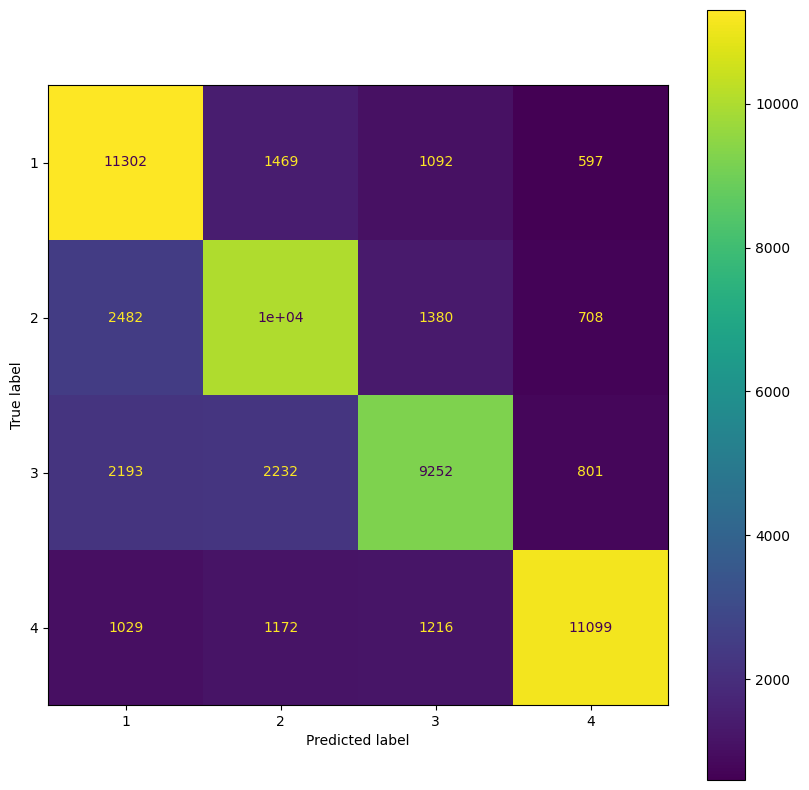

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10)  

In [89]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.7179887209136496